## Homework 1: Finding submarines
Cassia Cai <br> fmc2855@uw.edu

#### Goal: locate a submarine in the Puget Sound using noisy acoustic data

We do not know much about this submarine as it is a new technology that emits an unknown acoustic frequency that you need to detect. Unfortunately the submarine is moving so its location and path need to be determined.

Broad spectrum recording of acoustics data obtained over 24 hours in half-hour increments is available to you. The data file contain a matrix with 49 columns of data corresponding to the measurements of acoustic pressure taken over 24 hours. The measurements themselves are 3D and taken on a uniform grid of size 64 × 64 × 64. The provided notebook will visualize this data for you. 

In [315]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm

In [378]:
data_path = 'subdata.npy'

d = np.load(data_path) # huge matrix of size 262144 x 49 (columns contain flattened 3d matrix of size 64x64x64)

In [317]:
f_fft_2d = np.fft.fft2(d)
f_fft_shifted_2d = np.fft.fftshift(f_fft_2d)
f_fft_shifted_2d.shape

(262144, 49)

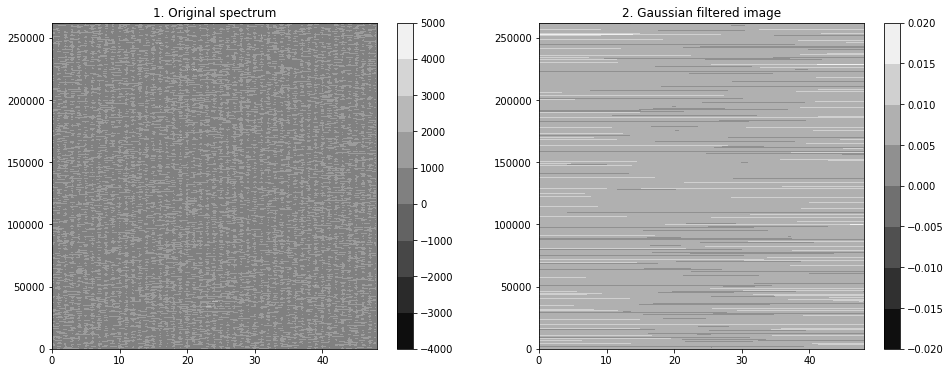

In [389]:
plt.rcParams["figure.figsize"] = (16,6)
plt.subplot(1, 2, 1); plt.title('1. Original spectrum')
plt.contourf(f_fft_shifted_2d); plt.colorbar()

plt.subplot(1, 2, 2); plt.title('2. Gaussian filtered image')
im_blur = ndimage.gaussian_filter(d, 20)
plt.contourf(im_blur); plt.colorbar() # alternative is im.show()

plt.show()
# this does not provide me much useful information. We should reshape our data.

In [318]:
d_reshaped = d.reshape((64, 64, 64, 49))

fftn_d_reshaped = scipy.fft.fftn(d_reshaped)
ifftn_d_reshaped = scipy.fft.fftshift(fftn_d_reshaped)
ifftn_d_reshaped.shape

(64, 64, 64, 49)

In [331]:
# filtering
keep_fraction = 0.05 # Define the fraction of coefficients (in each direction) we keep

im_fftn = ifftn_d_reshaped.copy()
r, c, d, e = im_fftn.shape

# Set to zero all rows with indices between r*keep_fraction and r*(1-keep_fraction):
im_fftn[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fftn[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
im_fftn[:, :, int(d*keep_fraction):int(d*(1-keep_fraction))] = 0
im_fftn[:, :, :, int(e*keep_fraction):int(e*(1-keep_fraction))] = 0

In [332]:
z_lev = 0
y_lev = 0
x_lev = 0
time_step = 0

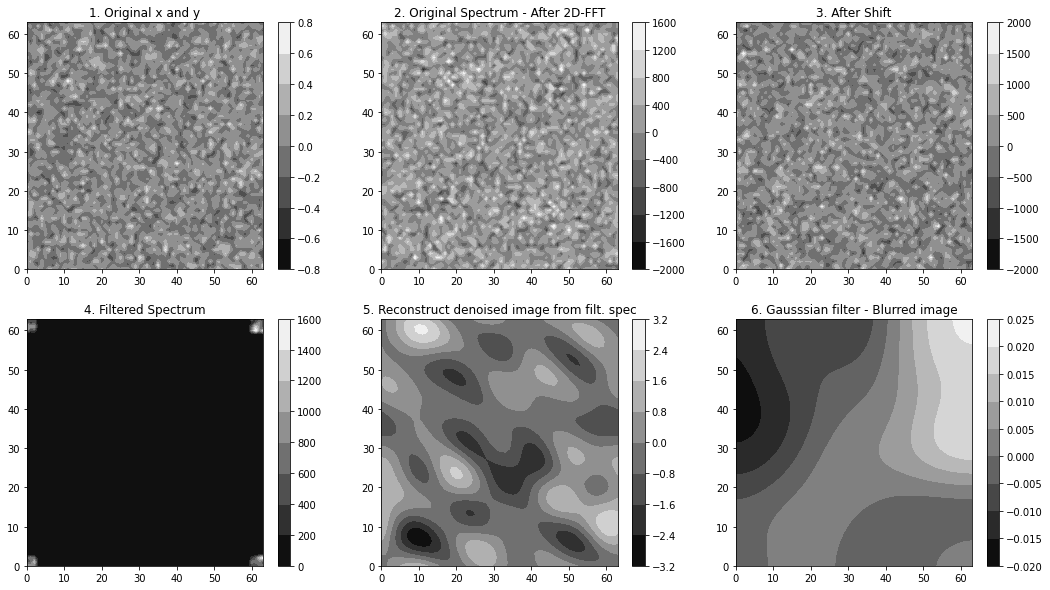

In [372]:
plt.rcParams["figure.figsize"] = (18,10)

data_x_y = d_reshaped[:, :, z_lev, time_step]

plt.subplot(2, 3, 1); plt.title('1. Original x and y')
plt.contourf(data_x_y); plt.colorbar()

plt.subplot(2, 3, 2); plt.title('2. Original Spectrum - After 2D-FFT')
plt.contourf(fftn_d_reshaped[:,:, z_lev, time_step]); plt.colorbar()

plt.subplot(2, 3, 3); plt.title('3. After Shift')
plt.contourf(ifftn_d_reshaped[:,:, z_lev, time_step]); plt.colorbar()

plt.subplot(2, 3, 4); plt.title('4. Filtered Spectrum')
plt.contourf(np.abs(im_fftn[:,:,z_lev,time_step]))
plt.colorbar()

plt.subplot(2, 3, 5); plt.title('5. Reconstruct denoised image from filt. spec')
im_new = fftpack.ifft2(im_fftn[:,:,z_lev,time_step]).real
plt.contourf(im_new); plt.colorbar() # alternative is im.show()

plt.subplot(2, 3, 6); plt.title('6. Gausssian filter - Blurred image')
im_blur = ndimage.gaussian_filter(d_reshaped[:, :, z_lev, time_step], 10)
plt.contourf(im_blur); plt.colorbar() # alternative is im.show()

plt.show()

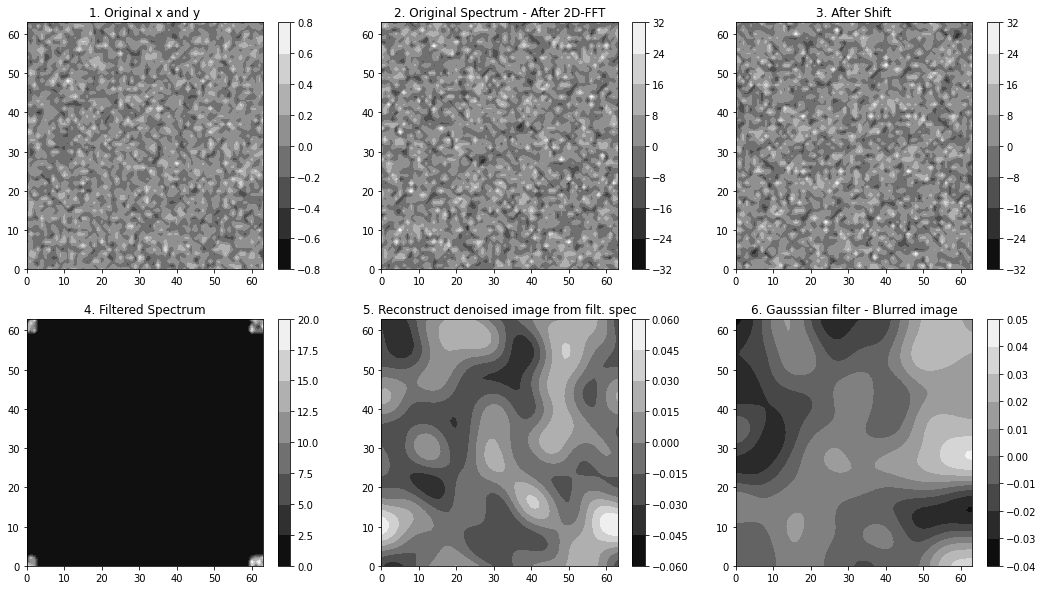

In [410]:
# doing a slice first and then fft
plt.rcParams["figure.figsize"] = (18,10)

data_x_y = d_reshaped[:, :, z_lev, time_step]

plt.subplot(2, 3, 1); plt.title('1. Original x and y')
plt.contourf(data_x_y); plt.colorbar()

plt.subplot(2, 3, 2); plt.title('2. Original Spectrum - After 2D-FFT')
fft2data_x_y = scipy.fft.fft2(data_x_y)
plt.contourf(fft2data_x_y); plt.colorbar()

plt.subplot(2, 3, 3); plt.title('3. After Shift')
ifft2data_x_y = scipy.fft.fftshift(fft2data_x_y)
plt.contourf(ifft2data_x_y); plt.colorbar()

plt.subplot(2, 3, 4); plt.title('4. Filtered Spectrum')

keep_fraction = 0.05
im_fft2 = ifft2data_x_y.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.contourf(np.abs(im_fft2)); plt.colorbar()

plt.subplot(2, 3, 5); plt.title('5. Reconstruct denoised image from filt. spec')
im_new = fftpack.ifft2(im_fft2).real
plt.contourf(im_new); plt.colorbar() # alternative is im.show()

plt.subplot(2, 3, 6); plt.title('6. Gausssian filter - Blurred image')
im_blur = ndimage.gaussian_filter(data_x_y, 5)
plt.contourf(im_blur); plt.colorbar() # alternative is im.show()

plt.show()

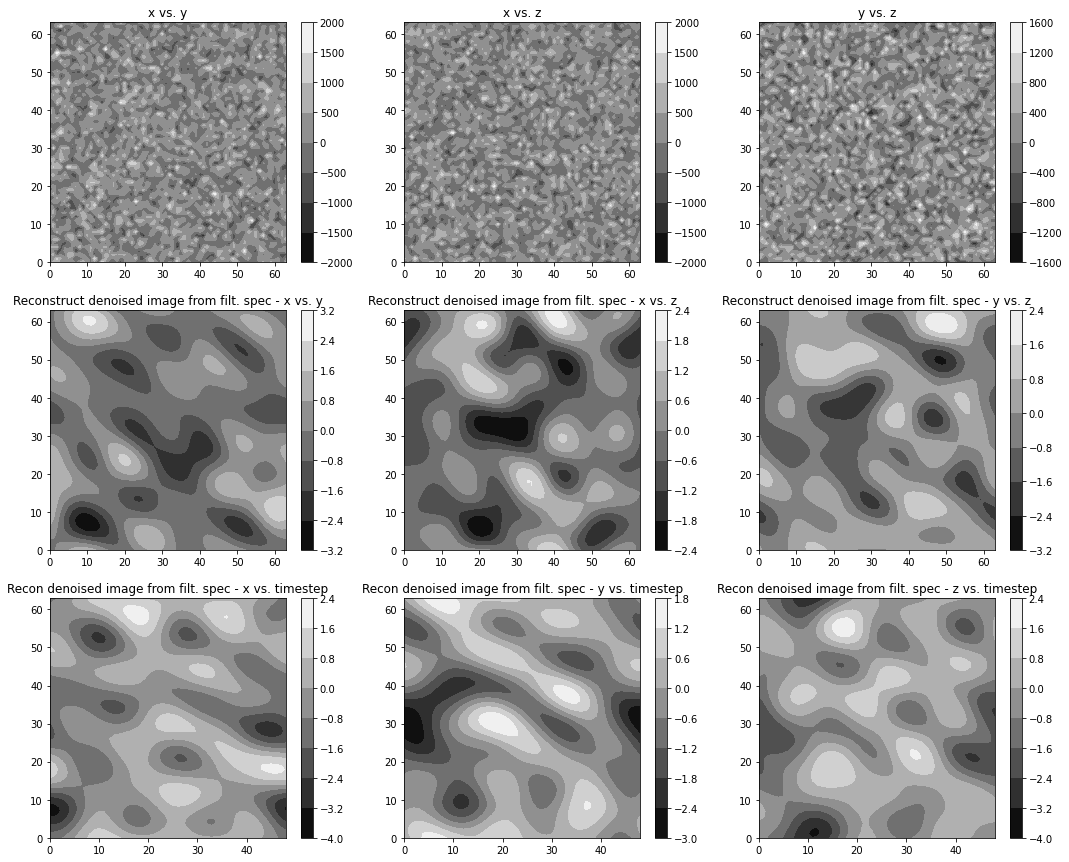

In [416]:
plt.rcParams["figure.figsize"] = (18,15)
x_y = f_fft_shifted[:, :, z_lev, time_step]; x_z = f_fft_shifted[:, y_lev , :, time_step]; y_z = f_fft_shifted[x_lev, :, :, time_step]

plt.subplot(3, 3, 1); plt.title('x vs. y')
plt.contourf(x_y); plt.colorbar()

plt.subplot(3, 3, 2); plt.title('x vs. z')
plt.contourf(x_z); plt.colorbar()

plt.subplot(3, 3, 3); plt.title('y vs. z')
plt.contourf(y_z); plt.colorbar()

plt.subplot(3, 3, 4); plt.title('Recon denoised image from filt. spec - x vs. y')
im_new = fftpack.ifft2(im_fftn[:,:,z_lev,time_step]).real
plt.contourf(im_new); plt.colorbar() 

plt.subplot(3, 3, 5); plt.title('Recon denoised image from filt. spec - x vs. z')
im_new = fftpack.ifft2(im_fftn[:,y_lev,:,time_step]).real
plt.contourf(im_new); plt.colorbar() 

plt.subplot(3, 3, 6); plt.title('Recon denoised image from filt. spec - y vs. z')
im_new = fftpack.ifft2(im_fftn[x_lev,:,:,time_step]).real
plt.contourf(im_new); plt.colorbar() 

plt.subplot(3, 3, 7); plt.title('Recon denoised image from filt. spec - x vs. timestep')
im_new = fftpack.ifft2(im_fftn[:,y_lev,z_lev,:]).real
plt.contourf(im_new); plt.colorbar() 

plt.subplot(3, 3, 8); plt.title('Recon denoised image from filt. spec - y vs. timestep')
im_new = fftpack.ifft2(im_fftn[x_lev,:,z_lev,:]).real
plt.contourf(im_new); plt.colorbar() 

plt.subplot(3, 3, 9); plt.title('Recon denoised image from filt. spec - z vs. timestep')
im_new = fftpack.ifft2(im_fftn[x_lev,y_lev,:,:]).real
plt.contourf(im_new); plt.colorbar() 

plt.show()